## Task 1

- On this input image Do 5 different data augmentations (Eg rotation, blur, zskew) using any library, and save those images in a folder.  
- Expectated Output: 1 Base Image, 5 Images each image being generated using different augmentation


In [1]:
# Import modules
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np
import typing as ty
import imutils
%matplotlib inline


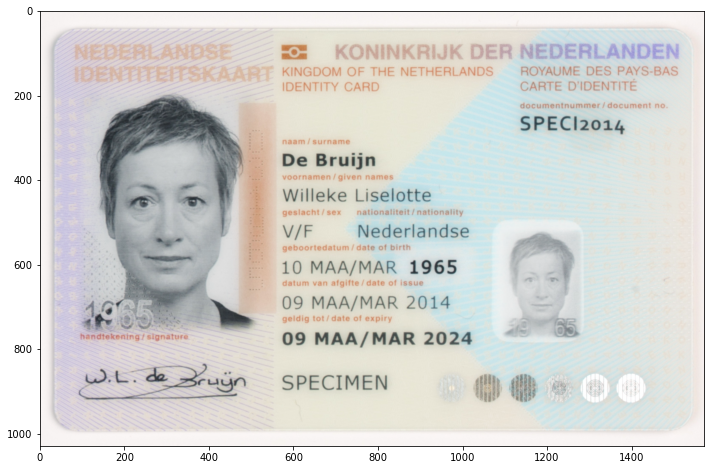

In [2]:
psprt_img = cv2.imread('specimen.jpg')
plt.figure(figsize=(15,8))
plt.imshow(psprt_img)

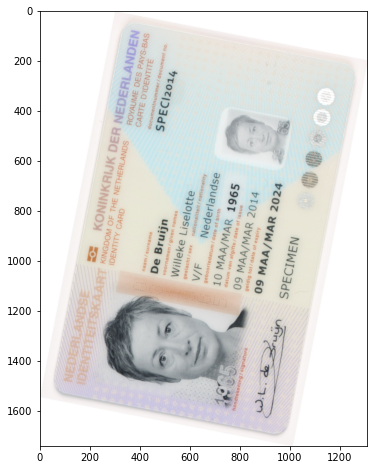

In [3]:
# Augment Rotate
# Function Modified from imutils
def rotate_bound(image:np.ndarray, angle:int): 
    # grab the dimensions of the image and then determine the
    # center
    (h, w) = image.shape[:2]
    (cX, cY) = (w / 2, h / 2)

    # grab the rotation matrix (applying the negative of the
    # angle to rotate clockwise), then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    M = cv2.getRotationMatrix2D((cX, cY), -angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])

    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))

    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY

    # perform the actual rotation and return the image
    return cv2.warpAffine(image, M, (nW, nH), borderValue=(255,255,255))

angle = random.randint(0,359)
img_rot = rotate_bound(psprt_img, angle)
plt.figure(figsize=(15,8))
plt.imshow(img_rot)


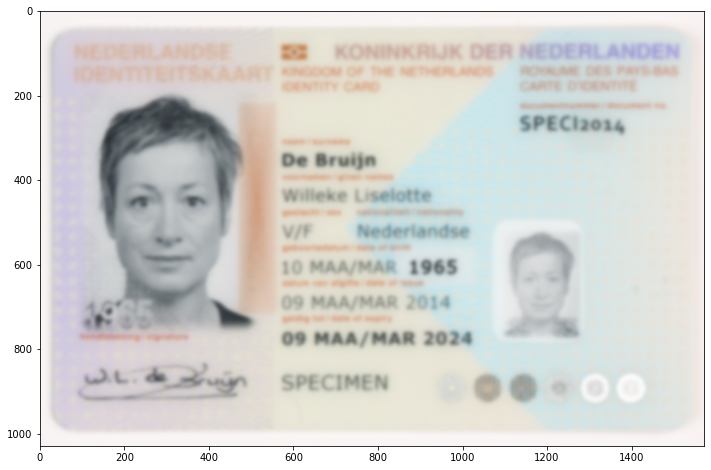

In [4]:
# Blur
gaus_filter = (2*random.randint(1,16))+1
img_gausBlur = cv2.GaussianBlur(psprt_img, (gaus_filter,gaus_filter),0) 
plt.figure(figsize=(15,8))
plt.imshow(img_gausBlur)

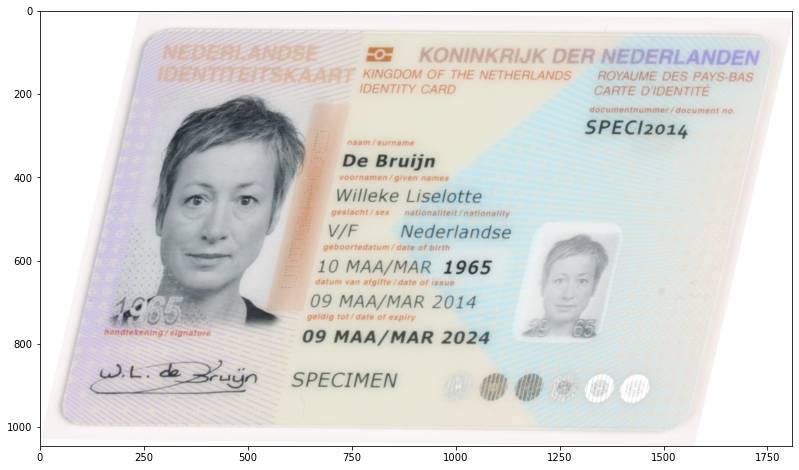

In [208]:
# Shear in x,y

def shear(psprt_img):
    """Shears the input image

    Args:
        psprt_img (np.ndarray): Original Image

    Returns:
        np.ndarray: Sheared Image
    """
    # Specify a border to image
    top_b = bottom_b = int(2 * psprt_img.shape[0])
    left_b = right_b = int(2 * psprt_img.shape[1])
    img_border = cv2.copyMakeBorder(psprt_img, top_b, bottom_b, left_b, right_b,  borderType=cv2.BORDER_CONSTANT, value=(255,255,255))

    # Shear operation
    (h, w) = img_border.shape[:2]
    sh_x = round(random.uniform(-0.5,0.5),3)
    sh_y = round(random.uniform(-0.5,0.5),3)
    M = np.float32([[1,    sh_x, 0],
                    [sh_y, 1  , 0],
                    [0,    0  , 1]])
    # apply a perspective transformation to the image                
    sheared_img = cv2.warpPerspective(img_border,M,(int(w*1),int(h*1)), borderValue=(255,255,255))

    # Crop out the borders from sheared image
    white_thr = 255*3
    left = min(np.flatnonzero(np.min(np.sum(sheared_img, axis=2), axis=1) < white_thr))
    bottom = min(np.flatnonzero(np.min(np.sum(sheared_img, axis=2), axis=0) < white_thr))
    right = max(np.flatnonzero(np.min(np.sum(sheared_img, axis=2), axis=1) < white_thr))
    top = max(np.flatnonzero(np.min(np.sum(sheared_img, axis=2), axis=0) < white_thr))

    crop_img = sheared_img[left:right, bottom:top]

    plt.figure(figsize=(15,8))
    plt.imshow(crop_img)
    # TODO: 
    # [ ] Refer to Rotation function to modify this one without usingborder & crop
    # [ ] Write the image to sp folder
    return crop_img

shear_img = shear(psprt_img)



